# RNN-ячейки

In [ ]:
from keras.layers import SimpleRNN

`SimpleRNN` - ячейка (как и любая другая рекурентная ячейка) может работать в двух разных режимах: она может возвращать либо полные последовательности, либо последний спрогнозированный член. За это отвечает аргумент `return_sequence`. Давайте посмотрим на пример:

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [41]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dense(60))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_30 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
dense_24 (Dense)             (None, None, 60)          1980      
Total params: 324,060
Trainable params: 324,060
Non-trainable params: 0
_________________________________________________________________


In [51]:
model = Sequential()
model.add(TimeDistributed(Dense(8), input_shape=(10, 16)))

In [50]:
model = Sequential()
model.add(TimeDistributed(Dense(32)))
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [42]:
from keras.layers import TimeDistributed

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(TimeDistributed(Dense(60)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_31 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 60)          1980      
Total params: 324,060
Trainable params: 324,060
Non-trainable params: 0
_________________________________________________________________


Рекурентные ячейки, как и обычные полносвязные, можно выстраивать в слои друг за другом. 

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # Последний выход должен выводить только последний результат
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


В прошлый раз мы с вами уже пытались классифицировать твиты на позитивные и негативные. Там фигурировла `LSTM`-ячейка и я сказал: "Ой, да прост воспринимайте её как чет прикольное, потом раз разберёмся." Потом только что наступило. 

Чтобы не возиться по деять лет с предобработкой данных, возьмём встроенный в keras набор с отзывами на фильмы.

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

top_words = 5000             # ограниичимся словарём из 5000 самых частых слов
max_review_length = 500      # обрежем все отзывы до 500 слов
embedding_vector_length = 32 # размерность эмбендинга

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# как выглядит вектор
print(X_train[0][:20])

25000 train sequences
25000 test sequences
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


В нашей базе данных все слова представлены в виде целых чисел. Каждое целое число эквивалентно какому-то определённому слову из отзыва.

![](http://samyzaf.com/ML/imdb/review1.png)

Если отзыв меньше 500 слов, дополним его до 500 пустотами. Это необходимо для корректной работы сетки.

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train[0][:20])

X_train shape: (25000, 500)
X_test shape: (25000, 500)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Давайте обучим простую реккурентную сетку используя `Embedding` ячейку и `SimpleRNN` ячейку:

In [31]:
from keras.layers import Dense


model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


In [9]:

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6077 - acc: 0.6672 - val_loss: 0.8128 - val_acc: 0.5430
Epoch 2/10
20000/20000 [==============================] - 10822s 541ms/step - loss: 0.3932 - acc: 0.8332 - val_loss: 0.4866 - val_acc: 0.7606
Epoch 3/10
20000/20000 [==============================] - 9240s 462ms/step - loss: 0.3077 - acc: 0.8769 - val_loss: 0.4844 - val_acc: 0.7656
Epoch 4/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2800 - acc: 0.8931 - val_loss: 0.4128 - val_acc: 0.8122
Epoch 5/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2092 - acc: 0.9204 - val_loss: 0.4529 - val_acc: 0.8102
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1698 - acc: 0.9361 - val_loss: 0.4313 - val_acc: 0.8364
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1322 - acc: 0.9527 - val_loss: 0.4325 -

Посмотрим что получилось. 

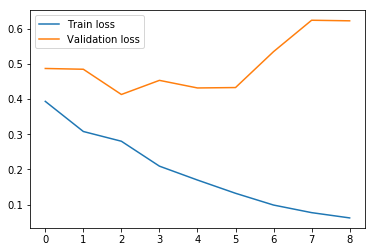

In [14]:
import matplotlib.pyplot as plt

start = 1
plt.plot( history.history['loss'][start:])
plt.plot( history.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

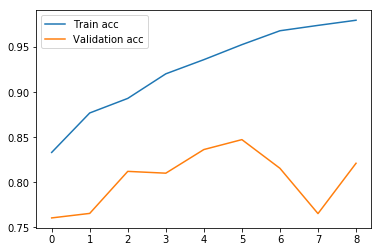

In [16]:
plt.plot( history.history['acc'][start:])
plt.plot( history.history['val_acc'][start:])
plt.legend(['Train acc', 'Validation acc'])

# LSTM-ячейка

In [17]:
from keras.layers import LSTM

from keras.layers import Dense

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5108 - acc: 0.7545 - val_loss: 0.4537 - val_acc: 0.8138
Epoch 2/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.3155 - acc: 0.8744 - val_loss: 0.2889 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2604 - acc: 0.8989 - val_loss: 0.3091 - val_acc: 0.8834
Epoch 4/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2368 - acc: 0.9101 - val_loss: 0.3651 - val_acc: 0.8642
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2209 - acc: 0.9162 - val_loss: 0.3319 - val_acc: 0.8648
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2032 - acc: 0.9255 - val_loss: 0.2901 - val_acc: 0.8794
Epoch 7/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1931 - acc: 0.9281 - val_loss: 0.2963 - val_acc:

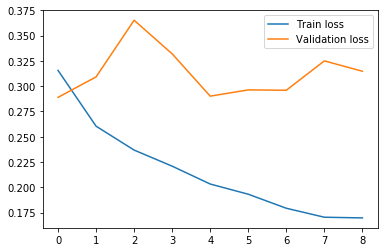

In [18]:
start = 1
plt.plot( history.history['loss'][start:])
plt.plot( history.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [19]:
plt.plot( history.history['acc'][start:])
plt.plot( history.history['val_acc'][start:])
plt.legend(['Train acc', 'Validation acc'])